### What are the chances?

People talk about chance pretty frequently, like what are the chances of closing a sale, of rain tomorrow, or of winning a game? But how exactly do we measure chance?

### Measuring chance

We can measure the chances of an event using probability. We can calculate the probability of some event by taking the number of ways the event can happen and dividing it by the total number of possible outcomes. For example, if we flip a coin, it can land on either heads or tails. To get the probability of the coin landing on heads, we divide the 1 way to get heads by the two possible outcomes, heads and tails. This gives us one half, or a fifty percent chance of getting heads. 

Probability is always between zero and 100 percent. If the probability of something is zero, it's impossible, and if the probability of something is 100%, it will certainly happen.

In [8]:
import numpy as np
import pandas as pd

In [9]:
amir_deals = pd.read_csv("amir_deals.csv")
amir_deals = amir_deals.drop("Unnamed: 0", axis = 1)
amir_deals.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


## Exercise 1: Calculating probabilities

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Both pandas as pd and numpy as np are loaded and `amir_deals` is available.

- Count the number of deals Amir worked on for each product type and store in `counts`.


- Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as `probs`.


- If you randomly select one of Amir's deals, what's the probability that the deal will involve `Product C`?

In [11]:
## q1: Count the number of deals Amir worked on for each product type and store in counts.
counts = amir_deals["product"].value_counts()
counts

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product J     2
Product G     2
Name: product, dtype: int64

In [12]:
## q2: Calculate the probability of selecting a deal for 
##     the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs

probs = amir_deals["product"].value_counts()/amir_deals["product"].count()
probs

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product J    0.011236
Product G    0.011236
Name: product, dtype: float64

In [13]:
## q3: If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?

> **If I randomly select one of Amir's deals, the probability that the deal will involve Product C is 8.43%.**

### Assigning salespeople

Let's look at a more complex scenario. There's a meeting coming up with a potential client, and we want to send someone from the sales team to the meeting. We'll put each person's name on a ticket in a box and pull one out randomly to decide who goes to the meeting.

<img src="p.jpg" style="max-width:800px">

Brian's name gets pulled out. The probability of Brian being selected is one out of four, or 25%.

### Sampling from a DataFrame

We can recreate this scenario in Python using the sample() method. By default, it randomly samples one row from the DataFrame. However, if we run the same thing again, we may get a different row since the sample method chooses randomly. If we want to show the team how we picked Brian, this won't work well.

<img src="p-1.jpg" style="max-width:800px">

### Setting a random seed

To ensure we get the same results when we run the script in front of the team, we'll set the random seed using np-dot-random-dot-seed. The seed is a number that Python's random number generator uses as a starting point, so if we orient it with a seed number, it will generate the same random value each time. The number itself doesn't matter. We could use 5, 139, or 3 million. The only thing that matters is that we use the same seed the next time we run the script. Now, we, or one of the sales-team members, can run this code over and over and get Brian every time.

<img src="p-2.jpg" style="max-width:800px">

### Sampling Without replacement

Now there's another potential client who wants to meet at the same time, so we need to pick another salesperson. Brian haas already been picked and he can't be in two meetings at once, so we'll pick between the remaining three. This is called sampling without replacement, since we aren't replacing the name we already pulled out.

<img src="p-4.jpg" style="max-width:800px">

This time, Claire is picked, and the probability of this is one out of three, or about 33%.

To recreate this in Python, we can pass 2 into the sample method, which will give us 2 rows of the DataFrame.

<img src="p-5.jpg" style="max-width:800px">

### Sampling with replacement

Now let's say the two meetings are happening on different days, so the same person could attend both. In this scenario, we need to return Brian's name to the box after picking it. This is called sampling with replacement.

<img src="p-3.jpg" style="max-width:800px">

Claire gets picked for the second meeting, but this time, the probability of picking her is 25%.


### Sampling with/without replacement in Python

To sample with replacement, set the replace argument to True, so names can appear more than once. If there were 5 meetings, all at different times, it's possible to pick some rows multiple times since we're replacing them each time.

<img src="p-6.jpg" style="max-width:800px">

## Exercise 2: Sampling deals

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

Both pandas as pd and numpy as np are loaded and amir_deals is available.


- Set the random seed to 24.


- Take a sample of 5 deals without replacement and store them as sample_without_replacement.


- Take a sample of 5 deals with replacement and save as sample_with_replacement.


- What type of sampling is better to use for this situation?

In [14]:
amir_deals.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


In [15]:
## q1: Set the random seed to 24. 
## q2: Take a sample of 5 deals without replacement and store them as sample_without_replacement. 

np.random.seed(24)
sample_without_replacement = amir_deals.sample(5, replace=False)
sample_without_replacement

,product,client,status,amount,num_users
127,Product B,Current,Won,2070.25,7
148,Product D,Current,Won,3485.48,52
77,Product B,Current,Won,6252.30,27
104,Product D,Current,Won,4110.98,39
166,Product C,New,Lost,3779.86,11


In [17]:
## q3: Take a sample of 5 deals with replacement and save as sample_with_replacement.

np.random.seed(24)
sample_with_replacement = amir_deals.sample(5, replace=True)
sample_with_replacement

,product,client,status,amount,num_users
162,Product D,Current,Won,6755.66,59
131,Product B,Current,Won,6872.29,25
87,Product C,Current,Won,3579.63,3
145,Product A,Current,Won,4682.94,63
145,Product A,Current,Won,4682.94,63


In [18]:
## q4: What type of sampling is better to use for this situation?

> **Without replacement sampling is better to use for this situation, because then we can get different feedbacks from different customers.**

### Independent events

Let's quickly talk about independence. Two events are independent if the probability of the second event isn't affected by the outcome of the first event. 

<img src="p-7.jpg" style="max-width:800px">

For example, if we're sampling with replacement, the probability that Claire is picked second is 25%, no matter who gets picked first. In general, when sampling with replacement, each pick is independent.

###  Dependent events

Similarly, events are considered dependent when the outcome of the first changes the probability of the second. If we sample without replacement, the probability that Claire is picked second depends on who gets picked first.


If Claire is picked first, there's 0% probability that Claire will be picked second.

<img src="p-8.jpg" style="max-width:800px">

If someone else is picked first, there's a 33% probability Claire will be picked second. In general, when sampling without replacement, each pick is dependent.

###  Discrete distributions

In this lesson, we'll take a deeper dive into probability and begin looking at probability distributions.

Let's consider rolling a standard, six-sided die.

<img src="d.jpg" style="max-width:800px">

There are six numbers, or six possible outcomes, and every number has one sixth, or about a 17 percent chance of being rolled. This is an example of a probability distribution.


### Probability distribution

A probability distribution describes the probability of each possible outcome in a scenario. 

<img src="pd.jpg" style="max-width:800px">

We can also talk about the expected value of a distribution, which is the mean of a distribution. We can calculate this by multiplying each value by its probability (one sixth in this case) and summing, so the expected value of rolling a fair die is 3.5.


### Visualizing a probability distribution

We can visualize this using a barplot, where each bar represents an outcome, and each bar's height represents the probability of that outcome.

###  Probability = area

We can calculate probabilities of different outcomes by taking areas of the probability distribution. For example, what's the probability that our die roll is less than or equal to 2? 

To figure this out, we'll take the area of each bar representing an outcome of 2 or less.

<img src="pd-1.jpg" style="max-width:800px">

Each bar has a width of 1 and a height of one sixth, so the area of each bar is one sixth. We'll sum the areas for 1 and 2, to get a total probability of one third.

### Uneven die

Now let's say we have a die where the two got turned into a three. This means that we now have a 0% chance of getting a 2, and a 33% chance of getting a 3. 

<img src="un.jpg" style="max-width:800px">

To calculate the expected value of this die, we now multiply 2 by 0, since it's impossible to get a 2, and 3 by its new probability, one third. This gives us an expected value that's slightly higher than the fair die.

###  Adding areas

When we visualize these new probabilities, the bars are no longer even. With this die, what's the probability of getting something less than or equal to 2? 

<img src="un-1.jpg" style="max-width:800px">

There's a one sixth probability of getting 1, and zero probability of getting 2, which sums to one sixth.

### Discrete probability distributions

The probability distributions you've seen so far are both discrete probability distributions, since they represent situations with discrete outcomes. Recall that discrete variables can be thought of as counted variables. 

<img src="dp.jpg" style="max-width:800px">

In the case of a die, we're counting dots, so we can't roll a 1-point-5 or 4-point-3. When all outcomes have the same probability, like a fair die, this is a special distribution called a discrete uniform distribution.

### Sampling from discrete distributions

Just like we sampled names from a box, we can do the same thing with probability distributions like the ones we've seen. Here's a DataFrame called die that represents a fair die, and its expected value is 3.5. 

In [20]:
die = {'number': [1,2,3,4,5,6], 
       "prob": [1/6,1/6,1/6,1/6,1/6,1/6]}
die = pd.DataFrame(die)
print(die)

   number      prob
0       1  0.166667
1       2  0.166667
2       3  0.166667
3       4  0.166667
4       5  0.166667
5       6  0.166667


In [21]:
np.mean(die["number"])

3.5

> We'll sample from it 10 times to simulate 10 rolls. Notice that we sample with replacement so that we're sampling from the same distribution every time.

In [29]:
rolls_10 = die.sample(10, replace = True)
rolls_10

,number,prob
1,2,0.166667
2,3,0.166667
1,2,0.166667
3,4,0.166667
5,6,0.166667
4,5,0.166667
0,1,0.166667
4,5,0.166667
1,2,0.166667
1,2,0.166667


###  Visualizing a sample
We can visualize the outcomes of the ten rolls using a histogram, defining the bins we want using np-dot-linspace.

In [30]:
import matplotlib.pyplot as plt 

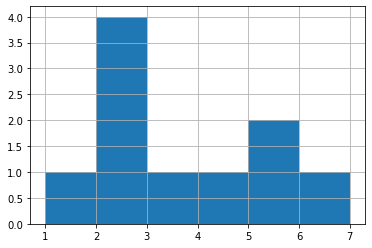

In [31]:
rolls_10['number'].hist(bins=np.linspace(1,7,7))
plt.show()

###  Sample distribution vs. theoretical distribution

Notice that we have different numbers of 1's, 2's, 3's, and so on since the sample was random, even though on each roll we had the same probability of rolling each number. 

In [32]:
np.mean(rolls_10["number"])

3.2

The mean of our sample is 3.2, which isn't super close to the 3.5 we were expecting.

### A bigger sample

In [33]:
rolls_100 = die.sample(100, replace = True)
rolls_100

,number,prob
4,5,0.166667
1,2,0.166667
1,2,0.166667
1,2,0.166667
1,2,0.166667
...,...,...
5,6,0.166667
3,4,0.166667
4,5,0.166667
1,2,0.166667


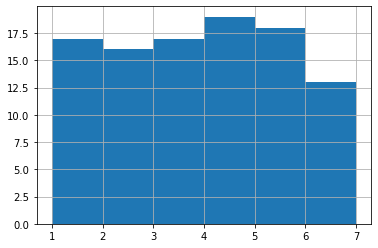

In [34]:
rolls_100['number'].hist(bins=np.linspace(1,7,7))
plt.show()

In [35]:
np.mean(rolls_100["number"])

3.44

If we roll the die 100 times, the distribution of the rolls looks a bit more even, and the mean is closer to 3.44.

### An even bigger sample

In [39]:
rolls_1000 = die.sample(1000, replace = True)
rolls_1000

,number,prob
2,3,0.166667
0,1,0.166667
3,4,0.166667
0,1,0.166667
0,1,0.166667
...,...,...
1,2,0.166667
1,2,0.166667
2,3,0.166667
0,1,0.166667


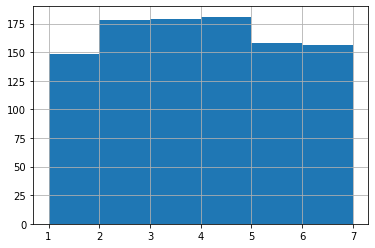

In [40]:
rolls_1000['number'].hist(bins=np.linspace(1,7,7))
plt.show()

In [41]:
np.mean(rolls_1000["number"])

3.491

If we roll 1000 times, it looks even more like the theoretical probability distribution and the mean closely matches 3.5.

### Law of large numbers

>> This is called the law of large numbers, which is the idea that as the size of your sample increases, the sample mean will approach the theoretical mean.

## Exercise 3: Creating a probability distribution

A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. 

On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. 

In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the `restaurant_groups` DataFrame.

Remember that `expected value` can be calculated by `multiplying each possible outcome with its corresponding probability and taking the sum`. The restaurant_groups data is available.

In [43]:
restaurant_groups = {'group_id': ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"],
                     
                     'group_size': [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]}

restaurant_groups = pd.DataFrame(restaurant_groups)
restaurant_groups

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


- Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]. Remember to show the plot.


- Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.


- Reset the index of size_dist.


- Rename the columns of size_dist to group_size and prob.


- Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.


- Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

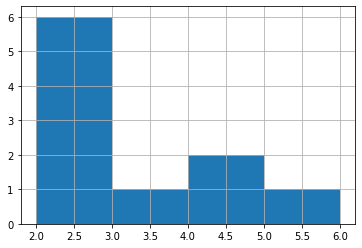

In [44]:
## q1: Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]. 
## Remember to show the plot.

restaurant_groups["group_size"].hist(bins = [2, 3, 4, 5, 6])
plt.show()

In [46]:
restaurant_groups.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


In [52]:
## q2: Count the number of each group_size in restaurant_groups, then 
## divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. 
## Save as size_dist.

num_group_size = restaurant_groups["group_size"].value_counts()
print(num_group_size)

num_rows = len(restaurant_groups)
print(num_rows)

size_dist = num_group_size / num_rows
size_dist

2    6
4    2
3    1
6    1
Name: group_size, dtype: int64
10


2    0.6
4    0.2
3    0.1
6    0.1
Name: group_size, dtype: float64

In [53]:
## q3: Reset the index of size_dist.
print(size_dist, '\n')
size_dist = size_dist.reset_index()
print(size_dist)

2    0.6
4    0.2
3    0.1
6    0.1
Name: group_size, dtype: float64 

   index  group_size
0      2         0.6
1      4         0.2
2      3         0.1
3      6         0.1


In [54]:
## q4: Rename the columns of size_dist to group_size and prob.
size_dist.columns = ["group_size", "prob"]
size_dist

,group_size,prob
0,2,0.6
1,4,0.2
2,3,0.1
3,6,0.1


In [55]:
## q5: Calculate the expected value of the size_distribution, which represents the expected group size, by 
## multiplying the group_size by the prob and taking the sum.

expected_value = (size_dist['group_size'] * size_dist["prob"]).sum()
expected_value

2.9

In [58]:
## q6: Calculate the probability of randomly picking a group of 4 or more people by 
## subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

group_4_or_more = size_dist[size_dist['group_size'] >= 4]
print(group_4_or_more, '\n')

prob_4_or_more = group_4_or_more['prob'].sum()
print(prob_4_or_more)

   group_size  prob
1           4   0.2
3           6   0.1 

0.30000000000000004


### Continuous distributions

We can use discrete distributions to model situations that involve discrete or countable variables, but how can we model continuous variables?

###  Continuous uniform distribution

Let's start with an example. The city bus arrives once every twelve minutes, so if you show up at a random time, you could wait anywhere from 0 minutes if you just arrive as the bus pulls in, up to 12 minutes if you arrive just as the bus leaves.

Let's model this scenario with a probability distribution. There are an infinite number of minutes we could wait since we could wait 1 minute, 1-point-5 minutes, 1-point-53 minutes, and so on, so we can't create individual blocks like we could with a discrete variable.


Instead, we'll use a continuous line to represent probability. The line is flat since there's the same probability of waiting any time from 0 to 12 minutes. This is called the continuous uniform distribution.

<img src="cd.jpg" style="max-width:600px">

### Probability still = area

Now that we have our distribution, let's figure out what the probability is that we'll wait between 4 and 7 minutes. Just like with discrete distributions, we can take the area from 4 to 7 to calculate probability.

<img src="cd-2.jpg" style="max-width:600px">

The width of this rectangle is 7 minus 4 which is 3. The height is one twelfth.Multiplying those together to get area, we get 3/12 or 25%.

### Uniform distribution in Python

Let's use the uniform distribution in Python to calculate the probability of waiting 7 minutes or less. We need to import uniform from scipy-dot-stats. 

<img src="cd-3.jpg" style="max-width:600px">

We can call uniform-dot-cdf and pass it 7, followed by the lower and upper limits, which in our case is 0 and 12. The probability of waiting less than 7 minutes is about 58%.

### "Greater than" probabilities

If we want the probability of waiting more than 7 minutes, we need to take 1 minus the probability of waiting less than 7 minutes.

<img src="cd-4.jpg" style="max-width:600px">

### Combining multiple uniform.cdf() calls

How do we calculate the probability of waiting 4 to 7 minutes using Python?

<img src="cd-5.jpg" style="max-width:600px">

We can start with the probability of waiting less than 7 minutes, then subtract the probability of waiting less than 4 minutes. This gives us 25%.

### Total area = 1

To calculate the probability of waiting between 0 and 12 minutes, we multiply 12 by 1/12, which is 1, or 100%. This makes sense since we're certain we'll wait anywhere from 0 to 12 minutes.

<img src="cd-6.jpg" style="max-width:600px">

### Generating random numbers according to uniform distribution

To generate random numbers according to the uniform distribution, we can use uniform-dot-rvs, which takes in the minimum value, maximum value, followed by the number of random values we want to generate. 

<img src="cd-7.jpg" style="max-width:600px">

Here, we generate 10 random values between 0 and 5.

### Other continuous distributions

Continuous distributions can take forms other than uniform where some values have a higher probability than others.

<img src="cd-8.jpg" style="max-width:800px">

No matter the shape of the distribution, the area beneath it must always equal 1.

### Other special types of distributions

This will also be true of other distributions, like the normal distribution or exponential distribution, which can be used to model many real-life situations.

<img src="ot.jpg" style="max-width:800px">

## Exercise 4: Data back-ups

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. 

Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. 

Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

- To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.


- Import uniform from scipy.stats and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5.


- Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called prob_greater_than_5.


- Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called prob_between_10_and_20.

In [59]:
## q1: To model how long Amir will wait for a back-up using a continuous uniform distribution, 
## save his lowest possible wait time as min_time and his longest possible wait time as max_time. 
## Remember that back-ups happen every 30 minutes.

min_time = 0
max_time = 30

In [60]:
## q2: Import uniform from scipy.stats and 
## calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5.

from scipy.stats import uniform
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
prob_less_than_5

0.16666666666666666

In [61]:
## q3: Calculate the probability that Amir has to wait more than 5 minutes, and 
## store in a variable called prob_greater_than_5.

prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
prob_greater_than_5

0.8333333333333334

In [62]:
## q4: Calculate the probability that Amir has to wait between 10 and 20 minutes, and 
## store in a variable called prob_between_10_and_20.

prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
prob_between_10_and_20

0.3333333333333333

## Exercise 5: Simulating wait times

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. 

Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

- Set the random seed to 334. Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as wait_times.


- Create a histogram of the simulated wait times and show the plot.

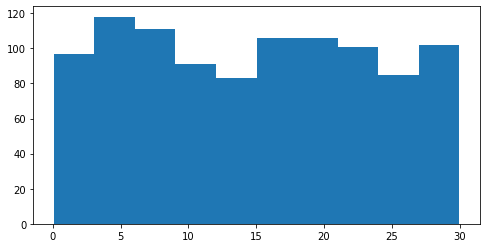

In [68]:
np.random.seed(334)

wait_times = uniform.rvs(min_time, max_time, size = 1000)
#print(wait_times, '\n')

plt.figure(figsize=(8,4))
plt.hist(wait_times)
plt.show()

###  The binomial distribution

It's time to further expand your toolbox of distributions. In this video, you'll learn about the binomial distribution.

### Binary outcomes

We'll start by flipping a coin, which has two possible outcomes, heads or tails, each with a probability of 50%. This is just one example of a binary outcome, or an outcome with two possible values. 

We could also represent these outcomes as a 1 and a 0, a success or a failure, and a win or a loss.

### A single flip

In Python, we can simulate this by importing binom from scipy-dot-stats and using the binom-dot-rvs function, which takes in the number of coins we want to flip, the probability of heads or success, and an argument called size, which is number of trials. size is a named argument, so we'll need to explicitly specify that the third argument corresponds to size, or we'll get incorrect results. 

This call will return a 1, which we'll count as a head, or a 0, which we'll count as tails. We can use binom-dot-rvs 1, 0.5, size equals 1 to flip 1 coin, with a 50% probability of heads, 1 time.

<img src="bd.jpg" style="max-width:600px">


### One flip many times

To perform eight coin flips, we can change the size argument to 8, which will flip 1 coin with a 50% chance of heads 8 times. 

<img src="bd-1.jpg" style="max-width:600px">

This gives us a set of 8 ones and zeros.


### Many flips one time

If we swap the first and last arguments, we flip eight coins one time. 

<img src="bd-2.jpg" style="max-width:600px">

This gives us one number, which is the total number of heads or successes.


### Many flips many times

Similarly, we can pass 3 as the first argument, and set size equal to 10 to flip 3 coins. 

<img src="bd-3.jpg" style="max-width:600px">

This returns 10 numbers, each representing the total number of heads from each set of flips.


### Other probabilities

We could also have a coin that's heavier on one side than the other, so the probability of getting heads is only 25%. To simulate flips with this coin, we'll adjust the second argument of binom-dot-rvs to 0-point-25. 

<img src="bd-4.jpg" style="max-width:600px">

The result has lower numbers, since getting multiple heads isn't as likely with the new coin.

### Binomial distribution

The binomial distribution describes the probability of the number of successes in a sequence of independent trials. In other words, it can tell us the probability of getting some number of heads in a sequence of coin flips. Note that this is a discrete distribution since we're working with a countable outcome. 

The binomial distribution can be described using two parameters, n and p. n represents the total number of trials being performed, and p is the probability of success. n and p are also the third and second arguments of binom-dot-rvs. 


<img src="bd-5.jpg" style="max-width:800px">


Here's what the distribution looks like for 3 coins and 10 flips/trials. We have the biggest chance of getting 5 heads total, and a much smaller chance of getting 0 heads or 10 heads.

## Exercise 6: Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. 

In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

- Import binom from scipy.stats and set the random seed to 10. Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.


- Simulate a typical week of Amir's deals, or one week of 3 deals.


- Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals. Print the mean number of deals he won per week.

In [69]:
## q1: Import binom from scipy.stats and set the random seed to 10. 
## Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.

from scipy.stats import binom
np.random.seed(10)

binom.rvs(1, 0.3, size=1)

array([1])

In [70]:
## q2: Simulate a typical week of Amir's deals, or one week of 3 deals.
np.random.seed(10)

binom.rvs(3, 0.3, size = 1)

array([1])

In [71]:
## q3: Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals. 
## Print the mean number of deals he won per week.

np.random.seed(10)

deals = binom.rvs(3, 0.3, size = 52)
print(deals,'\n')
print(np.mean(deals))

[1 0 1 1 1 0 0 1 0 0 1 2 0 1 2 1 1 0 2 1 1 0 1 1 1 1 1 1 1 1 2 1 2 0 0 0 0
 2 0 1 1 2 0 2 1 1 0 2 0 0 1 0] 

0.8269230769230769


### What's the probability of 7 heads?

To get the probability of getting 7 heads out of 10 coins, we can use binom-dot-pmf. The first argument is the number of heads or successes. The second argument is the number of trials, n, and the third is the probability of success, p. 

<img src="pr.jpg" style="max-width:600px">

If we flip 10 coins, there's about a 12% chance that exactly 7 of them will be heads.


###  What's the probability of 7 or fewer heads?

binom-dot-cdf gives the probability of getting a number of successes less than or equal to the first argument. 

<img src="pr-1.jpg" style="max-width:600px">

The probability of getting 7 or fewer heads out of 10 coins is about 95%.


### What's the probability of more than 7 heads?

We can take 1 minus the probability of getting 7 or fewer heads to get the probability of a number of successes greater than the first argument.

<img src="pr-2.jpg" style="max-width:600px">

## Exercise 7: Calculating binomial probabilities

Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. 

In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

- What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.


- What's the probability that Amir closes 1 or fewer deals in a week? Save this as prob_less_than_or_equal_1.


- What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.

In [72]:
## q1: What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.
prob_3 = binom.pmf(3, 3, 0.3)
prob_3

0.026999999999999982

In [73]:
## q2: What's the probability that Amir closes 1 or fewer deals in a week? Save this as prob_less_than_or_equal_1.

prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)
prob_less_than_or_equal_1

0.7839999999999999

In [74]:
## q3: What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.

prob_greater_than_1 = 1 - binom.cdf(1,3,0.3)
prob_greater_than_1

0.21600000000000008

###  Expected value

The expected value of the binomial distribution can be calculated by multiplying n times p. The expected number of heads we'll get from flipping 10 coins is 10 times 0-point-5, which is 5.

<img src="ev.jpg" style="max-width:600px">

## Exercise 8: How many sales will be won?

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. 

Recall, that the expected value of a binomial distribution can be calculated by n * p.

- Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.


- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.


- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [75]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


### Independence

It's important to remember that in order for the binomial distribution to apply, each trial must be independent, so the outcome of one trial shouldn't have an effect on the next.

<img src="in.jpg" style="max-width:800px">

For example, if we're picking randomly from these cards with zeros and ones, we have a 50-50 chance of getting a 0 or a 1.

But if we're sampling without replacement, the probabilities for the second trial are different due to the outcome of the first trial. Since these trials aren't independent, we can't calculate accurate probabilities for this situation using the binomial distribution.

<img src="in-1.jpg" style="max-width:800px">